# Creating a custom dataset

In [2]:
from datasets import load_dataset
dataset = load_dataset("imagefolder", data_dir="../dataset/train", split="train")


Resolving data files:   0%|          | 0/181 [00:00<?, ?it/s]

In [3]:
dataset


Dataset({
    features: ['image', 'caption', 'date', 'location', 'coordinates'],
    num_rows: 180
})

In [4]:
dataset.features

{'image': Image(mode=None, decode=True, id=None),
 'caption': Value(dtype='string', id=None),
 'date': Value(dtype='string', id=None),
 'location': Value(dtype='string', id=None),
 'coordinates': Value(dtype='string', id=None)}

# Split the data into training and validation sets

In [5]:
from datasets import DatasetDict

# First split: 80% for train, 20% for temporary
temp_datasets = dataset.train_test_split(test_size=0.2)

# Second split: split the 20% temporary into 10% test and 10% validation
test_val_datasets = temp_datasets['test'].train_test_split(test_size=0.5)

# Combine all splits into a DatasetDict
final_datasets = DatasetDict({
    'train': temp_datasets['train'],
    'test': test_val_datasets['test'],
    'validation': test_val_datasets['train']
})

final_datasets


DatasetDict({
    train: Dataset({
        features: ['image', 'caption', 'date', 'location', 'coordinates'],
        num_rows: 144
    })
    test: Dataset({
        features: ['image', 'caption', 'date', 'location', 'coordinates'],
        num_rows: 18
    })
    validation: Dataset({
        features: ['image', 'caption', 'date', 'location', 'coordinates'],
        num_rows: 18
    })
})

# Preview a random selection of the data

In [8]:
train_dataset = final_datasets['train']
sample = train_dataset.shuffle().select(range(5))
sample

Dataset({
    features: ['image', 'caption', 'date', 'location', 'coordinates'],
    num_rows: 5
})

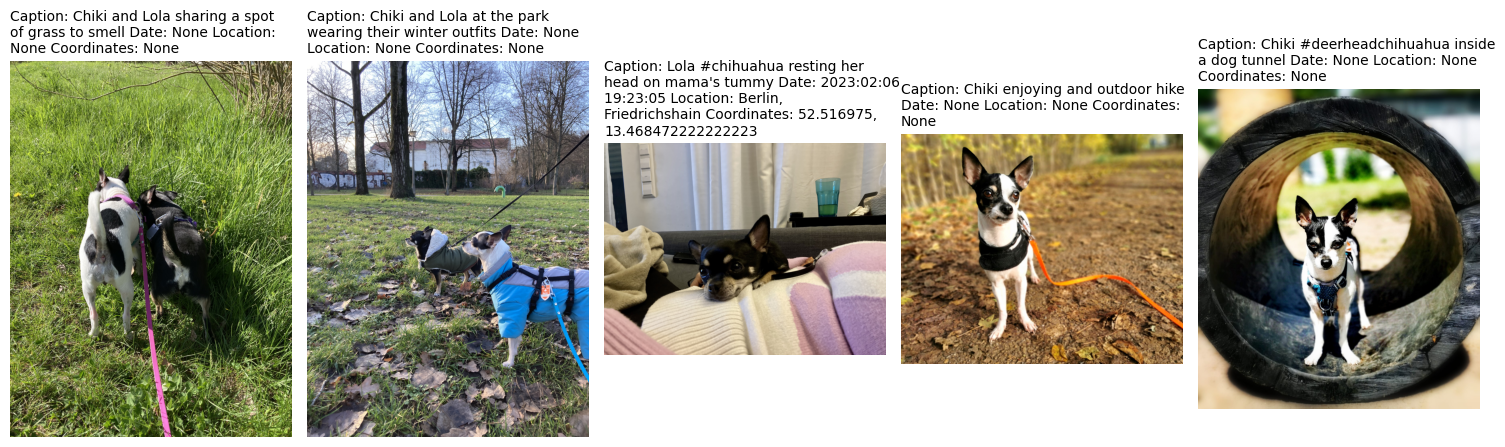

In [9]:
import matplotlib.pyplot as plt
import textwrap
import ast

# Function to wrap text
def wrap_text(text, width=60):
    return "\n".join(textwrap.wrap(text, width=width))

# Function to extract city and suburb from location dictionary
def extract_city_suburb(location):
    location_dict = ast.literal_eval(location)
    city = location_dict.get('city', '')
    suburb = location_dict.get('suburb', '')
    if city and suburb:
        return f"{city}, {suburb}"
    return city

fig, axs = plt.subplots(1, len(sample), figsize=(15, 5))

# If only one sample, axs might not be an array. Handle this case.
if len(sample) == 1:
    axs = [axs]

for i in range(len(sample)):
    image = sample[i]['image']
    
    axs[i].imshow(image)
    axs[i].axis('off')  # Hide axes
    
    # Extract city and suburb if location is present
    location = sample[i].get('location', '')
    if location:
        location = extract_city_suburb(location)
    
    # Wrap and set title with additional metadata
    title = wrap_text(
        f"Caption: {sample[i]['caption']}\nDate: {sample[i]['date']}\nLocation: {location}\nCoordinates: {sample[i]['coordinates']}", 
        width=40
    )
    axs[i].set_title(title, fontsize=10, loc='left')

plt.tight_layout()
plt.show()



# Save the Dataset

In [10]:
final_datasets.save_to_disk("../saved_dataset")

Saving the dataset (0/1 shards):   0%|          | 0/144 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/18 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/18 [00:00<?, ? examples/s]